In [ ]:
!git clone --branch hanson/siglip https://github.com/1hamzaiqbal/MFCLIP_acv.git
!pip install torch torchvision timm einops yacs tqdm opencv-python scikit-learn scipy pyyaml ruamel.yaml pytorch-ignite foolbox pandas matplotlib seaborn wilds ftfy

#google drives
from google.colab import drive
drive.mount('/content/drive')

Cloning into 'MFCLIP_acv'...
remote: Enumerating objects: 583, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 583 (delta 41), reused 23 (delta 15), pack-reused 519 (from 2)
Receiving objects: 100% (583/583), 6.92 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (174/174), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 60.5 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/conten

In [ ]:
%%shell
cd MFCLIP_acv/
mkdir -p logs/baseline/
chmod +x ./scripts/baseline.sh

In [ ]:
%%shell
# Download the images.tar.gz file to /content/
wget -O /content/images.tar.gz https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

# Extract the downloaded archive to the target directory in Google Drive
tar -xf /content/images.tar.gz -C /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_hanson/oxford_pets

--2025-11-29 19:51:19--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-11-29 19:51:20--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘/content/images.tar.gz’

/content/images.tar 100%[===================>] 755.23M  22.9MB/s    in 35s     

2025-11-29 19:51:57 (21.4 MB/s) - ‘/content/images.tar.gz’ saved [791918971/791918971]



In [ ]:
#download oxford pets annotaitons to drive
%%shell
wget -O /content/annotations.tar.gz https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
tar -xf /content/annotations.tar.gz -C /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_hanson/oxford_pets

--2025-11-29 19:47:29--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/annotations.tar.gz [following]
--2025-11-29 19:47:30--  https://thor.robots.ox.ac.uk/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘/content/annotations.tar.gz’

/content/annotation 100%[===================>]  18.28M  9.74MB/s    in 1.9s    

2025-11-29 19:47:33 (9.74 MB/s) - ‘/content/annotations.tar.gz’ saved [19173078/19173078]



In [ ]:
#download the split_zhou_OxfordPets.json required by the mf_clip repo
%%shell
gdown --id 1501r8Ber4nNKvmlFVQZ8SeUHTcdTTEqs -O /content/split_zhou_OxfordPets.json

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1501r8Ber4nNKvmlFVQZ8SeUHTcdTTEqs
To: /content/split_zhou_OxfordPets.json
100% 724k/724k [00:00<00:00, 159MB/s]


In [ ]:
#move downlaoded json file to drive
import shutil
shutil.copy("/content/split_zhou_OxfordPets.json", "/content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_hanson/oxford_pets/split_zhou_OxfordPets.json")

'/content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_hanson/oxford_pets/split_zhou_OxfordPets.json'

Finetune ArcFaceSigmoid on oxford pets

In [ ]:
# go to the repo root first
%cd /content/MFCLIP_acv

# (optional) quiet TF spam
%env TF_CPP_MIN_LOG_LEVEL=2

# run with repo-relative config paths (no MFCLIP_acv/ prefix)
!python main.py \
  --flag finetune \
  --dataset oxford_pets \
  --root  /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_data\
  --config-file configs/trainers/CoOp/rn50.yaml \
  --dataset-config-file configs/datasets/oxford_pets.yaml \
  --trainer ZeroshotCLIP \
  --surrogate RN50 \
  --head ArcFaceSigmoid \
  --num_epoch 100 \
  --bs 64 \
  --lr 0.01 \
  --optimizer SGD \
  --ratio 0.2 \
  --device cuda:0

/content/MFCLIP_acv
env: TF_CPP_MIN_LOG_LEVEL=2
2025-10-31 16:54:19.132928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761929659.153144    6614 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761929659.159601    6614 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761929659.175271    6614 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761929659.175299    6614 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761929659.175302    6614 c

Finetune SigLipHead on Oxford Pets

In [ ]:
# go to the repo root first
%cd /content/MFCLIP_acv

# (optional) quiet TF spam
%env TF_CPP_MIN_LOG_LEVEL=2

# run with repo-relative config paths (no MFCLIP_acv/ prefix)
!python main.py \
  --flag finetune \
  --dataset oxford_pets \
  --root  /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_data\
  --config-file configs/trainers/CoOp/rn50.yaml \
  --dataset-config-file configs/datasets/oxford_pets.yaml \
  --trainer ZeroshotCLIP \
  --surrogate RN50 \
  --head SigLipHead \
  --num_epoch 100 \
  --bs 64 \
  --lr 0.01 \
  --optimizer SGD \
  --ratio 0.2 \
  --device cuda:0

/content/MFCLIP_acv
env: TF_CPP_MIN_LOG_LEVEL=2
2025-10-31 19:36:12.536813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761939372.559706     938 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761939372.566632     938 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761939372.583664     938 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761939372.583704     938 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761939372.583708     938 c

Resume training section

In [ ]:
# go to the repo root first
%cd /content/MFCLIP_acv

# (optional) quiet TF spam
%env TF_CPP_MIN_LOG_LEVEL=2

# run with repo-relative config paths (no MFCLIP_acv/ prefix)
!python main.py \
  --flag finetune \
  --dataset oxford_pets \
  --root  /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_data\
  --config-file configs/trainers/CoOp/rn50.yaml \
  --dataset-config-file configs/datasets/oxford_pets.yaml \
  --trainer ZeroshotCLIP \
  --surrogate RN50 \
  --head ArcFaceSigmoid \
  --num_epoch 200 \
  --bs 64 \
  --lr 0.01 \
  --optimizer SGD \
  --ratio 0.2 \
  --device cuda:0 \
  --resume /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_data/oxford_pets/RN50_ArcFaceSigmoid_100ep.pth

/content/MFCLIP_acv
env: TF_CPP_MIN_LOG_LEVEL=2
2025-10-31 22:22:38.562378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761949358.599104    1503 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761949358.610841    1503 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761949358.636682    1503 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761949358.636715    1503 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761949358.636723    1503 c

HingeLossHead train

In [ ]:
# go to the repo root first
%cd /content/MFCLIP_acv

# (optional) quiet TF spam
%env TF_CPP_MIN_LOG_LEVEL=2

# run with repo-relative config paths (no MFCLIP_acv/ prefix)
!python main.py \
--flag finetune \
--dataset oxford_pets \
--root  /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_hanson\
--config-file configs/trainers/CoOp/rn50.yaml \
--dataset-config-file configs/datasets/oxford_pets.yaml \
--trainer ZeroshotCLIP \
--surrogate RN50 \
--head HingeLossHead \
--num_epoch 300 \
--bs 64 \
--lr 0.01 \
--optimizer SGD \
--ratio 0.2 \
--device cuda:0

/content/MFCLIP_acv
env: TF_CPP_MIN_LOG_LEVEL=2
2025-11-29 20:26:04.181352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764447964.202489    1912 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764447964.208771    1912 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764447964.224722    1912 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764447964.224751    1912 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764447964.224754    1912 c

Eval Test

In [ ]:
# go to the repo root first
%cd /content/MFCLIP_acv

# (optional) quiet TF spam
%env TF_CPP_MIN_LOG_LEVEL=2


        # python main.py \
        # --root ${DATA} \
        # --seed ${SEED} \
        # --dataset-config-file configs/datasets/${DATASET}.yaml \
        # --config-file configs/trainers/CoOp/rn50.yaml \
        # --flag eval_adv \
        # --dataset ${DATASET} \
        # --attack ${at} \
        # > logs/eval/${DATASET}.log 2>&1


# run with repo-relative config paths (no MFCLIP_acv/ prefix)
!python main.py \
  --flag eval_adv \
  --dataset oxford_pets \
  --root  /content/drive/MyDrive/FL25Courses/CSE5619/adcv_proj_data\
  --config-file configs/trainers/CoOp/rn50.yaml \
  --dataset-config-file configs/datasets/oxford_pets.yaml \
  --surrogate RN50 \
  --head SigLipHead \

temp graphs

In [ ]:
# Parsed training data (epoch 1–300 continuous)
siglip_data = {
    "epoch": list(range(1, 301)),
    "train_acc": [
        0.0249, 0.0329, 0.0510, 0.0704, 0.0784, 0.0921, 0.0984, 0.1088, 0.1299, 0.1412,
        0.1486, 0.1604, 0.1746, 0.1639, 0.1848, 0.2001, 0.2042, 0.2171, 0.2270, 0.2451,
        0.2467, 0.2632, 0.2769, 0.2947, 0.3056, 0.3117, 0.3303, 0.3374, 0.3564, 0.3654,
        0.3805, 0.3956, 0.4062, 0.3923, 0.4211, 0.4331, 0.4487, 0.4556, 0.4539, 0.4693,
        0.4915, 0.4989, 0.4871, 0.4978, 0.5090, 0.4997, 0.5178, 0.5222, 0.5192, 0.5228,
        0.3284, 0.3188, 0.3292, 0.3479, 0.3660, 0.3904, 0.3882, 0.3967, 0.4350, 0.4389,
        0.4433, 0.4696, 0.4910, 0.5175, 0.4978, 0.5291, 0.5441, 0.5921, 0.5757, 0.5776,
        0.5968, 0.6184, 0.6401, 0.6395, 0.6738, 0.6880, 0.6809, 0.6974, 0.7083, 0.7141,
        0.7344, 0.7393, 0.7563, 0.7681, 0.7785, 0.7829, 0.7889, 0.7845, 0.7832, 0.7963,
        0.8024, 0.8109, 0.8114, 0.8122, 0.8202, 0.8213, 0.8191, 0.8279, 0.8221, 0.8130,
        # second run (epochs 100–199 → shift +100)
        0.6960, 0.6168, 0.5940, 0.6031, 0.6165, 0.6417, 0.6647, 0.6587, 0.6875, 0.7018,
        0.6908, 0.6982, 0.7050, 0.7179, 0.7075, 0.7234, 0.7462, 0.7629, 0.7459, 0.7514,
        0.7684, 0.7667, 0.7788, 0.7766, 0.7988, 0.7988, 0.7876, 0.7961, 0.7936, 0.8078,
        0.8114, 0.8259, 0.8459, 0.8347, 0.8418, 0.8399, 0.8374, 0.8542, 0.8583, 0.8520,
        0.8490, 0.8522, 0.8755, 0.8555, 0.8709, 0.8698, 0.8745, 0.8829, 0.8695, 0.8788,
        0.8802, 0.8854, 0.8936, 0.8923, 0.8980, 0.9073, 0.8956, 0.8991, 0.9002, 0.9065,
        0.8983, 0.9142, 0.9120, 0.9084, 0.9205, 0.9120, 0.9200, 0.9158, 0.9175, 0.9205,
        0.9194, 0.9120, 0.9120, 0.9169, 0.9216, 0.9208, 0.9205, 0.9301, 0.9202, 0.9238,
        0.9328, 0.9265, 0.9298, 0.9290, 0.9279, 0.9367, 0.9361, 0.9334, 0.9279, 0.9342,
        0.9356, 0.9315, 0.9416, 0.9285, 0.9290, 0.9298, 0.9372, 0.9331, 0.9402, 0.9306,
        # third run (epochs 200–299 → shift +200)
        0.8821, 0.8306, 0.8114, 0.8183, 0.8292, 0.8237, 0.8235, 0.8394, 0.8292, 0.8300,
        0.8509, 0.8438, 0.8344, 0.8424, 0.8487, 0.8501, 0.8638, 0.8525, 0.8607, 0.8662,
        0.8544, 0.8632, 0.8596, 0.8643, 0.8761, 0.8835, 0.8813, 0.8725, 0.8813, 0.8813,
        0.8821, 0.8906, 0.8879, 0.8936, 0.8975, 0.9060, 0.8958, 0.9035, 0.9046, 0.9090,
        0.9093, 0.9084, 0.9112, 0.9145, 0.9232, 0.9131, 0.9161, 0.9224, 0.9180, 0.9309,
        0.9202, 0.9287, 0.9213, 0.9263, 0.9411, 0.9328, 0.9348, 0.9427, 0.9290, 0.9383,
        0.9419, 0.9361, 0.9474, 0.9408, 0.9378, 0.9430, 0.9402, 0.9474, 0.9523, 0.9446,
        0.9490, 0.9507, 0.9545, 0.9518, 0.9523, 0.9575, 0.9600, 0.9523, 0.9542, 0.9520,
        0.9509, 0.9600, 0.9559, 0.9515, 0.9531, 0.9550, 0.9567, 0.9592, 0.9655, 0.9600,
        0.9534, 0.9572, 0.9581, 0.9504, 0.9583, 0.9570, 0.9608, 0.9553, 0.9570, 0.9526
    ],
    "loss": [
        0.300682, 0.141101, 0.136872, 0.133790, 0.129643, 0.126109, 0.125693, 0.123705, 0.120134, 0.116471,
        0.115366, 0.113301, 0.113823, 0.112399, 0.110566, 0.107158, 0.105874, 0.105400, 0.103695, 0.101748,
        0.100815, 0.099087, 0.098063, 0.095410, 0.093246, 0.091873, 0.090263, 0.089735, 0.086608, 0.085305,
        0.083164, 0.082091, 0.079980, 0.080603, 0.079200, 0.077489, 0.076449, 0.074230, 0.074575, 0.073843,
        0.072168, 0.070468, 0.070769, 0.070104, 0.069343, 0.069866, 0.068665, 0.068912, 0.068941, 0.068672,
        0.093888, 0.096789, 0.095719, 0.091967, 0.088343, 0.086457, 0.087148, 0.084484, 0.080565, 0.079833,
        0.080497, 0.076004, 0.073604, 0.069490, 0.072667, 0.068173, 0.065974, 0.060261, 0.062194, 0.061750,
        0.058065, 0.056629, 0.053787, 0.053498, 0.049603, 0.048725, 0.048635, 0.046542, 0.044809, 0.045237,
        0.042530, 0.040654, 0.038358, 0.037753, 0.036524, 0.035049, 0.034774, 0.035224, 0.034454, 0.033388,
        0.032630, 0.031952, 0.030859, 0.030201, 0.030260, 0.030688, 0.030643, 0.029372, 0.029704, 0.030730,
        0.048393, 0.059393, 0.063138, 0.062857, 0.060197, 0.056968, 0.053125, 0.053418, 0.049836, 0.049034,
        0.048804, 0.048417, 0.046442, 0.045231, 0.046407, 0.044725, 0.041555, 0.039882, 0.040696, 0.041018,
        0.038705, 0.038374, 0.036411, 0.035572, 0.032832, 0.033032, 0.034910, 0.033239, 0.033422, 0.031763,
        0.029809, 0.028367, 0.025613, 0.027864, 0.026583, 0.027079, 0.027461, 0.024647, 0.023906, 0.024105,
        0.025021, 0.024279, 0.020595, 0.023651, 0.021936, 0.022463, 0.020947, 0.019320, 0.021820, 0.019627,
        0.020183, 0.019066, 0.018074, 0.018472, 0.017275, 0.015813, 0.017623, 0.016761, 0.016090, 0.015262,
        0.016565, 0.015000, 0.014602, 0.015580, 0.013895, 0.014439, 0.014476, 0.014391, 0.013575, 0.013529,
        0.013431, 0.014091, 0.014211, 0.013423, 0.013362, 0.012803, 0.013150, 0.011707, 0.013045, 0.012295,
        0.011778, 0.011910, 0.011611, 0.012207, 0.012020, 0.011030, 0.010894, 0.011380, 0.011437, 0.011216,
        0.010907, 0.012467, 0.010341, 0.011769, 0.012020, 0.011513, 0.011012, 0.011388, 0.010232, 0.011551,
        0.019537, 0.029389, 0.032784, 0.030935, 0.029247, 0.029928, 0.029959, 0.027757, 0.029357, 0.028637,
        0.026335, 0.027199, 0.027358, 0.027045, 0.026022, 0.025430, 0.024474, 0.024794, 0.024243, 0.022314,
        0.025378, 0.023624, 0.023838, 0.023012, 0.021583, 0.019696, 0.020181, 0.020974, 0.019732, 0.020173,
        0.019507, 0.018940, 0.018703, 0.018446, 0.017454, 0.016161, 0.017936, 0.016680, 0.016418, 0.015764,
        0.015320, 0.015234, 0.014452, 0.014257, 0.013164, 0.014509, 0.014369, 0.014019, 0.013701, 0.012048,
        0.013126, 0.011762, 0.012990, 0.012494, 0.009672, 0.011137, 0.010516, 0.009758, 0.011626, 0.010509,
        0.010649, 0.010528, 0.009529, 0.009942, 0.010177, 0.009561, 0.009888, 0.009007, 0.008418, 0.009441,
        0.008619, 0.008239, 0.007931, 0.008832, 0.008418, 0.007559, 0.007117, 0.007623, 0.007606, 0.008155,
        0.007597, 0.007284, 0.007242, 0.008093, 0.007149, 0.007726, 0.007316, 0.007482, 0.006233, 0.006966,
        0.007819, 0.007108, 0.007551, 0.007887, 0.007216, 0.007423, 0.006815, 0.007699, 0.007227, 0.007956
    ]
}


arcface_simgoid_data = {
    "epoch": list(range(1, 301)),
    "train_acc": [
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0008, 0.0066, 0.0107, 0.0258, 0.0299, 0.0452, 0.0589,
        0.0762, 0.0795, 0.1028, 0.1225, 0.1447, 0.1724, 0.1916, 0.2045, 0.2366, 0.2500,
        0.2955, 0.3081, 0.3432, 0.3602, 0.3799, 0.3978, 0.4137, 0.4375, 0.4515, 0.4767,
        0.4811, 0.4992, 0.5082, 0.5088, 0.5274, 0.5219, 0.5260, 0.5200, 0.5274, 0.2341,
        0.2089, 0.2505, 0.2884, 0.3298, 0.3432, 0.3750, 0.4013, 0.4060, 0.4600, 0.4696,
        0.4718, 0.5014, 0.5126, 0.5214, 0.5535, 0.5589, 0.5853, 0.5874, 0.6022, 0.6157,
        0.6247, 0.6505, 0.6626, 0.6779, 0.6801, 0.6826, 0.6894, 0.7103, 0.7270, 0.7431,
        0.7470, 0.7481, 0.7610, 0.7623, 0.7700, 0.7736, 0.7780, 0.7807, 0.7791, 0.7911,
        0.7933, 0.7843, 0.7961, 0.8048, 0.8010, 0.8062, 0.7922, 0.8004, 0.7947, 0.7209,
        0.6086, 0.6033, 0.5924, 0.6055, 0.6360, 0.6321, 0.6379, 0.6524, 0.6664, 0.6639,
        0.6727, 0.6864, 0.6817, 0.6804, 0.6993, 0.7034, 0.7253, 0.7078, 0.7089, 0.7212,
        0.7338, 0.7294, 0.7363, 0.7415, 0.7426, 0.7511, 0.7601, 0.7645, 0.7637, 0.7763,
        0.7692, 0.7736, 0.7717, 0.7922, 0.8002, 0.8010, 0.7919, 0.7906, 0.7892, 0.8073,
        0.8037, 0.8092, 0.8130, 0.8226, 0.8155, 0.8161, 0.8300, 0.8320, 0.8237, 0.8333,
        0.8295, 0.8268, 0.8407, 0.8388, 0.8342, 0.8281, 0.8509, 0.8416, 0.8465, 0.8503,
        0.8673, 0.8635, 0.8583, 0.8717, 0.8591, 0.8657, 0.8725, 0.8731, 0.8679, 0.8712,
        0.8753, 0.8698, 0.8753, 0.8734, 0.8887, 0.8783, 0.8794, 0.8736, 0.8764, 0.8816,
        0.8838, 0.8893, 0.8854, 0.8816, 0.8840, 0.8783, 0.8895, 0.8999, 0.8857, 0.8791,
        0.8956, 0.8854, 0.8947, 0.8961, 0.8914, 0.8838, 0.8997, 0.8964, 0.8835, 0.8465,
        0.7733, 0.7854, 0.7708, 0.7579, 0.7634, 0.7719, 0.7637, 0.7610, 0.7717, 0.7796,
        0.7884, 0.7851, 0.7930, 0.7930, 0.7966, 0.7993, 0.7980, 0.7947, 0.8021, 0.7991,
        0.8117, 0.8046, 0.8056, 0.8152, 0.8268, 0.8185, 0.8284, 0.8342, 0.8180, 0.8320,
        0.8344, 0.8270, 0.8150, 0.8369, 0.8427, 0.8413, 0.8517, 0.8443, 0.8646, 0.8522,
        0.8522, 0.8454, 0.8564, 0.8588, 0.8528, 0.8618, 0.8797, 0.8731, 0.8564, 0.8720,
        0.8646, 0.8783, 0.8766, 0.8849, 0.8805, 0.8854, 0.8753, 0.8904, 0.8904, 0.8898,
        0.8983, 0.8975, 0.8854, 0.8920, 0.8983, 0.8931, 0.9024, 0.9005, 0.9101, 0.9024,
        0.9115, 0.9068, 0.9128, 0.9027, 0.9032, 0.9060, 0.9167, 0.9104, 0.9115, 0.9041,
        0.9101, 0.9128, 0.9191, 0.9087, 0.9191, 0.9145, 0.9153, 0.9200, 0.9156, 0.9172,
        0.9156, 0.9137, 0.9249, 0.9213, 0.9147, 0.9117, 0.9112, 0.9065, 0.9205, 0.9205
    ],
    "loss": [
        0.430324, 0.412573, 0.411923, 0.410288, 0.407537, 0.404431, 0.401289, 0.398143, 0.395250, 0.391837,
        0.389296, 0.385544, 0.382089, 0.377784, 0.373468, 0.368316, 0.362682, 0.356291, 0.350374, 0.341748,
        0.335777, 0.326750, 0.321997, 0.311205, 0.305050, 0.296486, 0.284154, 0.275005, 0.269630, 0.259549,
        0.251044, 0.234998, 0.230976, 0.218690, 0.215326, 0.208338, 0.201448, 0.196794, 0.186870, 0.178138,
        0.171249, 0.170125, 0.164024, 0.163539, 0.161167, 0.155682, 0.154904, 0.155023, 0.159787, 0.156498,
        0.286945, 0.285791, 0.273014, 0.259387, 0.240821, 0.235942, 0.226289, 0.214986, 0.211657, 0.194148,
        0.191565, 0.187178, 0.178499, 0.171891, 0.171364, 0.158239, 0.155769, 0.149239, 0.143555, 0.137107,
        0.132956, 0.133329, 0.121147, 0.118415, 0.111277, 0.111831, 0.110486, 0.108887, 0.101816, 0.097182,
        0.090508, 0.087276, 0.088473, 0.084838, 0.081640, 0.077841, 0.079932, 0.077919, 0.075699, 0.076017,
        0.072017, 0.071548, 0.074240, 0.070407, 0.067214, 0.068196, 0.066329, 0.073450, 0.067222, 0.069912,
        0.099116, 0.144231, 0.147799, 0.146452, 0.141534, 0.131901, 0.132284, 0.133156, 0.124566, 0.120757,
        0.120912, 0.119791, 0.112992, 0.114378, 0.114473, 0.106777, 0.105229, 0.097634, 0.102240, 0.103252,
        0.099410, 0.094344, 0.095821, 0.094429, 0.093905, 0.091624, 0.088895, 0.084045, 0.084265, 0.084796,
        0.080209, 0.080564, 0.083104, 0.080654, 0.074732, 0.070811, 0.069751, 0.073914, 0.075611, 0.072810,
        0.070740, 0.069387, 0.069248, 0.064675, 0.062566, 0.066365, 0.067485, 0.060495, 0.058989, 0.063578,
        0.058111, 0.061895, 0.060934, 0.056819, 0.057006, 0.058057, 0.059994, 0.053013, 0.055508, 0.053866,
        0.052280, 0.045338, 0.046913, 0.049232, 0.044411, 0.049513, 0.046394, 0.044099, 0.046296, 0.045437,
        0.045470, 0.041288, 0.045666, 0.044039, 0.042562, 0.039171, 0.044280, 0.041753, 0.043625, 0.042646,
        0.040688, 0.040205, 0.037260, 0.040268, 0.038976, 0.039613, 0.041022, 0.037967, 0.034400, 0.039201,
        0.040484, 0.036782, 0.040270, 0.034738, 0.035416, 0.036538, 0.039352, 0.034839, 0.035170, 0.040869,
        0.054951, 0.081173, 0.079125, 0.082098, 0.086387, 0.085547, 0.079781, 0.083712, 0.085379, 0.079468,
        0.081375, 0.075498, 0.077979, 0.075932, 0.075485, 0.074941, 0.071903, 0.071668, 0.072691, 0.070910,
        0.068619, 0.066657, 0.070373, 0.069889, 0.065223, 0.062836, 0.064878, 0.059764, 0.060968, 0.063990,
        0.057594, 0.057410, 0.059704, 0.064139, 0.057051, 0.054582, 0.055804, 0.050947, 0.055130, 0.047834,
        0.052854, 0.052054, 0.054963, 0.051069, 0.049449, 0.053770, 0.049822, 0.042626, 0.044238, 0.051838,
        0.044479, 0.048491, 0.042871, 0.043201, 0.040572, 0.041596, 0.039795, 0.044627, 0.036932, 0.038518,
        0.039108, 0.037079, 0.036135, 0.039555, 0.037718, 0.034042, 0.037013, 0.033449, 0.034631, 0.030386,
        0.033410, 0.031023, 0.031871, 0.029258, 0.034588, 0.032497, 0.032847, 0.027829, 0.031850, 0.031029,
        0.032776, 0.031568, 0.031002, 0.028701, 0.032078, 0.028167, 0.027921, 0.030010, 0.026338, 0.028575,
        0.028730, 0.028343, 0.029144, 0.027277, 0.025541, 0.029969, 0.029602, 0.032284, 0.030925, 0.027903
    ]
}

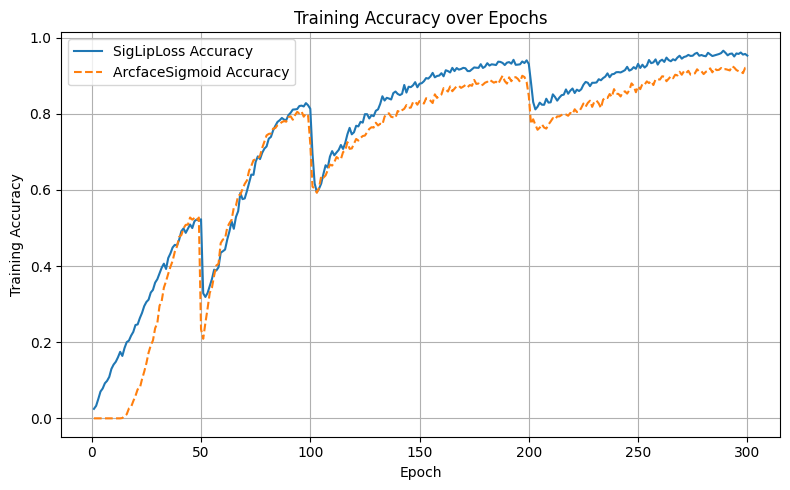

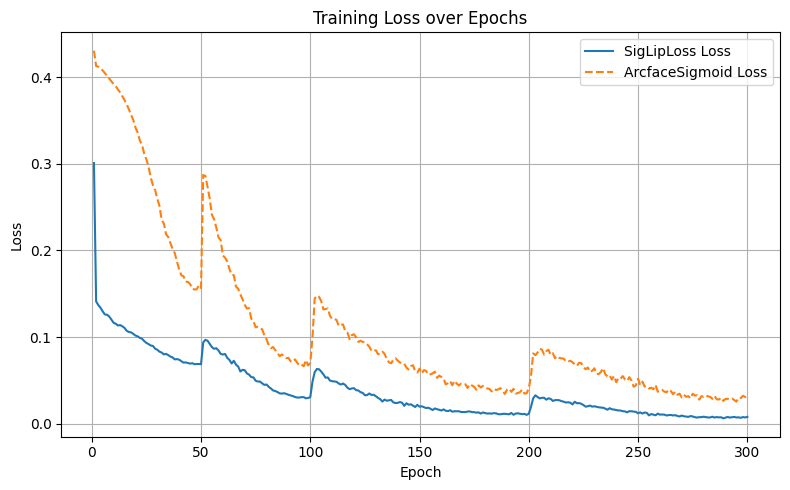

In [ ]:
import matplotlib.pyplot as plt
label1="SigLipLoss"
label2="ArcfaceSigmoid"
plt.figure(figsize=(8, 5))
plt.plot(siglip_data["epoch"], siglip_data["train_acc"], label=f"{label1} Accuracy")
plt.plot(arcface_simgoid_data["epoch"], arcface_simgoid_data["train_acc"], label=f"{label2} Accuracy", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(siglip_data["epoch"], siglip_data["loss"], label=f"{label1} Loss")
plt.plot(arcface_simgoid_data["epoch"], arcface_simgoid_data["loss"], label=f"{label2} Loss", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
